# Impor Library


In [10]:
# Impor Library yang Diperlukan
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import math

# Preprocessing Data

In [11]:
# Load Dataset
df_original = pd.read_csv('dataset_herbamate.csv')

# Ganti koma dengan titik dan konversi kolom 'relevance_score' menjadi float
df = df_original.copy()
df['relevance_score'] = df['relevance_score'].str.replace(',', '.').astype(float)

# Pastikan tidak ada nilai NaN dan menghapusnya
df_cleaned = df.dropna()

# Memisahkan 'symptoms' menjadi list dan menerapkan MultiLabelBinarizer
mlb = MultiLabelBinarizer()
symptoms = df_cleaned['symptoms'].str.split(',')

# Transformasi symptoms menjadi format binary
symptom_matrix = mlb.fit_transform(symptoms)

# Membuat DataFrame untuk matrix symptoms
symptom_df = pd.DataFrame(symptom_matrix, columns=mlb.classes_)

# Gabungkan dengan dataset asli
df_symptoms = pd.concat([df_cleaned, symptom_df], axis=1)

# Drop kolom 'symptoms' yang asli
df_symptoms = df_symptoms.drop('symptoms', axis=1)

# Cek data setelah pembersihan
print(df_symptoms.head())

# Simpan data yang telah diproses ke file CSV
df_symptoms.to_csv('preprocessed_data.csv', index=False)
print("Data yang sudah diproses telah disimpan sebagai 'preprocessed_data.csv'")


  herbs                                       usage_method  relevance_score  \
0  Adas  Rebus 1-2 sendok teh biji adas dalam 1,5 gelas...              0.7   
1  Adas  Rebus 1-2 sendok teh biji adas dalam segelas a...              0.6   
2  Adas  Rebus 1-2 sendok teh biji adas dalam segelas a...              0.8   
3  Adas  Rebus 1-2 sendok teh biji adas dalam segelas a...              0.9   
4  Adas  Seduh 1-2 sendok teh biji adas dalam segelas a...              1.0   

   Batuk  Bau badan  Bau mulut  Darah tinggi  Dehidrasi  Demam  Diare  ...  \
0      1          0          0             0          0      0      0  ...   
1      0          0          0             0          0      0      0  ...   
2      0          0          0             0          0      0      0  ...   
3      0          0          0             0          0      0      0  ...   
4      0          0          0             0          0      0      0  ...   

   Sakit kepala  Sakit perut  Sakit tenggorokan  Sariawa

# Data Preparation

In [12]:
# Memisahkan Fitur dan Target
X = df_symptoms.drop(['herbs', 'usage_method'], axis=1)
y = df_symptoms['relevance_score']

# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pastikan data sudah dalam format numerik
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Cek bentuk data
print(X_train.shape, y_train.shape)


(800, 45) (800,)


# Build Model

In [13]:
# Membangun Model Neural Network
def create_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model

# Inisialisasi dan latih model
model = create_model(X_train.shape[1])

# Early stopping untuk mencegah overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Ringkasan model
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3410 - mae: 0.4480 - val_loss: 0.1196 - val_mae: 0.1403
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1145 - mae: 0.1360 - val_loss: 0.0962 - val_mae: 0.1018
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0895 - mae: 0.0826 - val_loss: 0.0810 - val_mae: 0.0639
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0772 - mae: 0.0573 - val_loss: 0.0725 - val_mae: 0.0541
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0699 - mae: 0.0499 - val_loss: 0.0655 - val_mae: 0.0476
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0632 - mae: 0.0431 - val_loss: 0.0594 - val_mae: 0.0404
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0577 - mae: 0.0388 - val_loss: 0.0540 - val_mae: 0.0352
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0528 - mae: 0.0355 - val_loss: 0.0495 - val_mae: 0.0315
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0481 - mae:

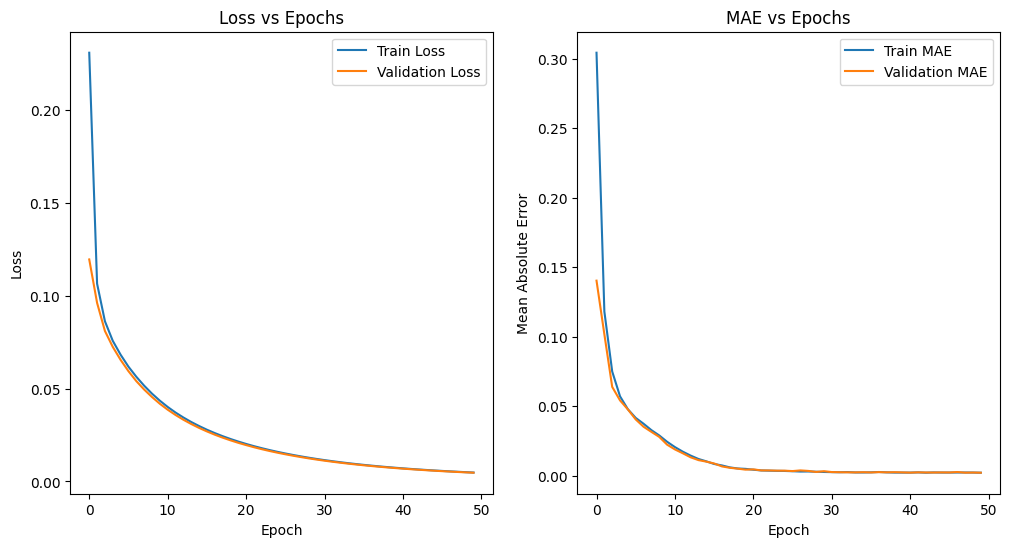

In [14]:
# Melatih Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


# Model Evaluation

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


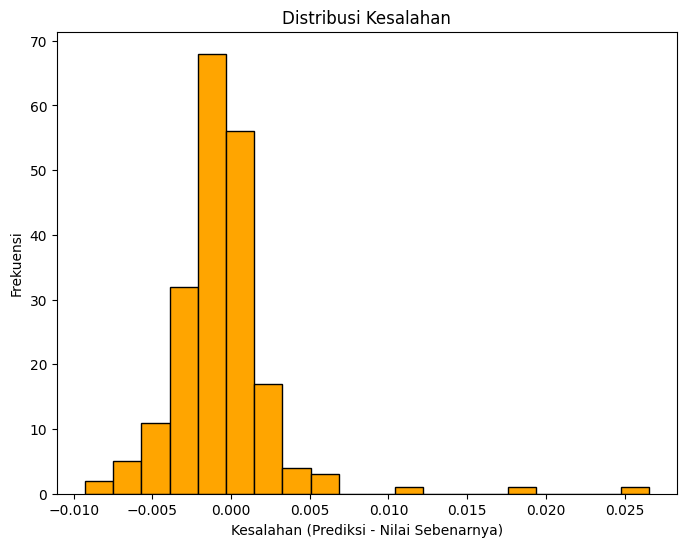

R-squared: 0.999096795121898
Mean Squared Error (MSE): 1.2283952980637068e-05
Root Mean Squared Error (RMSE): 0.003504847069507751


In [15]:
# Evaluasi Model
y_pred = model.predict(X_test)

# Pastikan y_test adalah array NumPy dan lakukan flatten()
y_test = y_test.values.flatten()  # Mengonversi ke array NumPy dan meratakan dimensi
y_pred = y_pred.flatten()  # Meratakan y_pred jika perlu

# Hitung error dan evaluasi metrik
errors = y_test - y_pred

# Visualisasi Distribusi Kesalahan (Error Distribution)
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='orange', edgecolor='black')
plt.title('Distribusi Kesalahan')
plt.xlabel('Kesalahan (Prediksi - Nilai Sebenarnya)')
plt.ylabel('Frekuensi')
plt.show()

# Evaluasi R2, MSE, dan RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Herb Prediction Based on Symptons

In [16]:
# Fungsi untuk Memprediksi dan Memberikan Rekomendasi Herbal
def recommend_herbs(symptoms_input):
    """

    Args:
      symptoms_input:

    Returns:

    """
    # Pisahkan gejala input menjadi list
    input_symptoms = symptoms_input.split(',')

    # Transformasi input gejala ke dalam format yang sesuai dengan model
    symptoms_input_transformed = mlb.transform([input_symptoms])

    # Cek apakah jumlah fitur input sama dengan jumlah fitur model
    # Jika tidak sama, pad dengan nol (kolom yang tidak ada pada input)
    if symptoms_input_transformed.shape[1] != X_train.shape[1]:
        # Menambahkan kolom nol untuk fitur yang tidak ada pada input
        missing_cols = X_train.shape[1] - symptoms_input_transformed.shape[1]
        symptoms_input_transformed = np.pad(symptoms_input_transformed, ((0, 0), (0, missing_cols)), mode='constant')

    # Prediksi skor relevansi
    predicted_relevance_score = model.predict(symptoms_input_transformed)

    # Menambahkan kolom relevansi pada dataset herbs dan urutkan berdasarkan relevansi
    df['predicted_relevance_score'] = model.predict(X)

    # Filter hanya herbal yang relevan dengan gejala yang dimasukkan
    # Cek apakah gejala herbal cocok dengan input gejala
    df['relevant'] = df['symptoms'].apply(lambda x: any(symptom in x for symptom in input_symptoms))

    # Filter berdasarkan relevansi (hanya herbal yang memiliki gejala yang cocok)
    df_relevant = df[df['relevant'] == True]

    # Urutkan berdasarkan predicted relevance score
    df_sorted = df_relevant.sort_values(by='predicted_relevance_score', ascending=False)

    # Hapus duplikasi herbal
    df_sorted = df_sorted.drop_duplicates(subset='herbs')

    # Tampilkan top 5 rekomendasi herbal dan usage method
    top_5 = df_sorted[['herbs', 'usage_method', 'predicted_relevance_score']].head(5)

    return top_5

# Coba fungsi rekomendasi herbal dengan input gejala
symptoms_input = 'Nyeri otot'
top_5_recommendations = recommend_herbs(symptoms_input)
print(top_5_recommendations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
          herbs                                       usage_method  \
930  Temu Hitam  Parut 1 ruas temu hitam yang sudah dicuci, cam...   
159   Gandarusa  Untuk meredakan nyeri otot, tumbuk daun gandar...   
900  Tapak Kuda  Rebus segenggam daun tapak kuda dalam 500 ml a...   
833       Sereh  Siapkan 2 batang sereh, cuci bersih, kemudian ...   
713  Pecut Kuda  Ambil 1 sendok makan akar pecut kuda yang tela...   

     predicted_relevance_score  
930                   0.897795  
159                   0.897795  
900                   0.848600  
833                   0.848600  
713                   0.848600  


# Save Model

In [17]:
# Menyimpan model yang telah dilatih
import pickle

# Simpan model
with open('model_herb.pkl', 'wb') as file:
    pickle.dump(model, file)

# Cek apakah model tersimpan
print("Model saved to model_herb.pkl")


Model saved to model_herb.pkl


In [19]:
# Load model
with open('model_herb.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")

Model loaded successfully
